### Principal Component Analysis (PCA)
   
PCA is a mathematical procedure that transforms a number of (possibly) correlated variables into a (smaller) number of uncorrelated variables called *principal components*. PCA reduces the number of variables retaining as much information as possible. The larger the absolute value of the coefficient, the more important the corresponding variable is in calculating the component. Find more information [here](https://en.wikipedia.org/wiki/Principal_component_analysis).

#### PCA from scratch (`numpy`)

A dataset can be represented as a matrix, $X$, of dimension $(n, m)$. PCA applies a rotation of the $m$ vectors in space, such that we end up to a new matrix $B = \mathbb{R}X$ made of orthogonal vectors (the eigenvectors, here called principal components).

In the example below, the following steps are performed:
- Definition of a matrix of shape $(n,m)$,
- Centering of the data in the matrix, 
- Calculation of the covariance matrix of the centered data,
- Eigendecomposition of the covariance matrix. 
- The eigenvectors and eigenvalues are taken as the principal components and singular values and used to project the original data.

In [12]:
# libraries
import numpy as np

# define a matrix
np.random.seed(42)
A = np.random.rand(20,10)
print(f"Original matrix (of shape: {A.shape}):")
print(A)
print()

# step 1: 
M = np.mean(A.T, axis=1)
print("Means of each columns:")
print(M)
print()

# step 2: 
C = A - M
print("Columns centering:")
print(C)
print()

# step 3: 
V = np.cov(C.T)
print(f"Covariance matrix of the centered data (shape: {V.shape}):")
print(V)
print()

# step 4: 
values, vectors = np.linalg.eig(V)
print(f"Eigenvectors (PCA components - shape: {vectors.shape}):")
print(vectors)
print()
print(f"Eigenvalues (PCA variance - shape: {values.shape}):")
print(values)
print()

# project data into the subspace (reduction)
P = vectors.T.dot(C.T)
print(f"PCA reduction (matrix of shape: ({P.T.shape})):")
print(P.T)
print()

Original matrix (of shape: (20, 10)):
[[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
  0.05808361 0.86617615 0.60111501 0.70807258]
 [0.02058449 0.96990985 0.83244264 0.21233911 0.18182497 0.18340451
  0.30424224 0.52475643 0.43194502 0.29122914]
 [0.61185289 0.13949386 0.29214465 0.36636184 0.45606998 0.78517596
  0.19967378 0.51423444 0.59241457 0.04645041]
 [0.60754485 0.17052412 0.06505159 0.94888554 0.96563203 0.80839735
  0.30461377 0.09767211 0.68423303 0.44015249]
 [0.12203823 0.49517691 0.03438852 0.9093204  0.25877998 0.66252228
  0.31171108 0.52006802 0.54671028 0.18485446]
 [0.96958463 0.77513282 0.93949894 0.89482735 0.59789998 0.92187424
  0.0884925  0.19598286 0.04522729 0.32533033]
 [0.38867729 0.27134903 0.82873751 0.35675333 0.28093451 0.54269608
  0.14092422 0.80219698 0.07455064 0.98688694]
 [0.77224477 0.19871568 0.00552212 0.81546143 0.70685734 0.72900717
  0.77127035 0.07404465 0.35846573 0.11586906]
 [0.86310343 0.62329813 0.33089802 0.06355

#### PCA (`sklearn`)

PCA is handily implemented in scikit-learn. The class is built in a way that it can be applied to test data, as much as any other sklearn model/preprocessor. One can also specify how many principal components we want to retain. 

In [13]:
from sklearn.decomposition import PCA

print(f"Original matrix (of shape: {A.shape}):")
print(A)
print()

# create the PCA instance
pca = PCA(n_components=2)

# fit on data
pca.fit(A)

# access values and vectors
print('PCA components:')
print(pca.components_)
print()
print('PCA explained variance:')
print(pca.explained_variance_)
print()

# transform data
B = pca.transform(A)
print('PCA transform:')
print(B)

Original matrix (of shape: (20, 10)):
[[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
  0.05808361 0.86617615 0.60111501 0.70807258]
 [0.02058449 0.96990985 0.83244264 0.21233911 0.18182497 0.18340451
  0.30424224 0.52475643 0.43194502 0.29122914]
 [0.61185289 0.13949386 0.29214465 0.36636184 0.45606998 0.78517596
  0.19967378 0.51423444 0.59241457 0.04645041]
 [0.60754485 0.17052412 0.06505159 0.94888554 0.96563203 0.80839735
  0.30461377 0.09767211 0.68423303 0.44015249]
 [0.12203823 0.49517691 0.03438852 0.9093204  0.25877998 0.66252228
  0.31171108 0.52006802 0.54671028 0.18485446]
 [0.96958463 0.77513282 0.93949894 0.89482735 0.59789998 0.92187424
  0.0884925  0.19598286 0.04522729 0.32533033]
 [0.38867729 0.27134903 0.82873751 0.35675333 0.28093451 0.54269608
  0.14092422 0.80219698 0.07455064 0.98688694]
 [0.77224477 0.19871568 0.00552212 0.81546143 0.70685734 0.72900717
  0.77127035 0.07404465 0.35846573 0.11586906]
 [0.86310343 0.62329813 0.33089802 0.06355

As we can see, the first two vectors of our manual calculation with numpy correspond to the two principal components calculated here. These vectors are a linear combination of the original vectors but they retain as much information as possible. By looking at the explained variance, we notice that we can catch ~40% of the original variance with just two vectors (instead of 10).

Notice that the original dataset length is retained and the PCA transformation reduces the original dataset to the shape $(n, p)$, where $n$ is the original number of rows and $p$ is the number of principal components chosen.

Finally, we can see that the more vectors we retain, the more variance we can explain:

In [37]:
my_vars = []
for i in range(1, A.shape[1]+1):
    pca = PCA(n_components=i)
    pca.fit(A)
    my_vars.append(np.sum(pca.explained_variance_))

In [38]:
import matplotlib.pyplot as plt

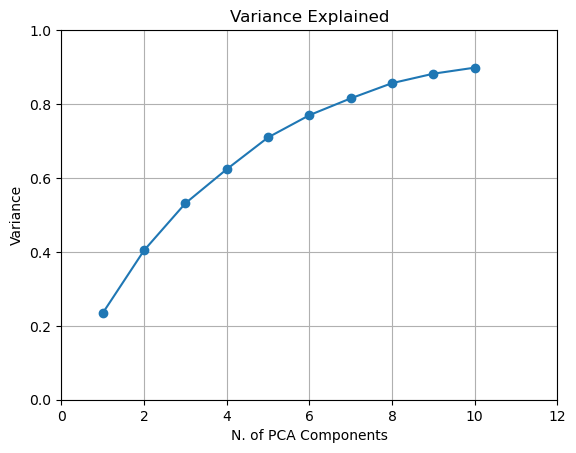

In [48]:
plt.plot([i for i in range(1, A.shape[1]+1)], my_vars, '-o')
plt.xlim([0,12])
plt.ylim([0,1])
plt.grid()
plt.xlabel('N. of PCA Components')
plt.ylabel('Variance')
plt.title('Variance Explained')
plt.show()